This file was used to test the method for use with elastic bars, employing initial displacement

In [13]:
import numpy as np

def A_matrix(n):
    A = np.zeros((n-1, n-1))
    for i in range(0, len(A)):
        for j in range(len(A[i])):
            if j == i - 1:
                A[i][j] = 1
            elif j == i:
                A[i][j] = -2
            elif j == i + 1:
                A[i][j] = 1
            else:
                A[i][j] = 0

    return A


In [14]:
import numpy as np



def g_function(x, t, a, b, T, c_squared):
    
    # L = b-a
    # amp = 0.05*L

    # g = np.zeros((len(x)))
    # g[0] = amp*np.sin(57.17698623*t)
    # g[len(g)-1] = -amp*np.sin(57.17698623*t)

    g = np.zeros((len(x)))

    return g


def ibvp_step(x, state, n, deltat, deltax, tk, a, b, A, I, c_squared, T):
    
    gt = g_function(x, tk, a, b, T, c_squared)
    
    gt1 = g_function(x, tk+deltat, a, b, T, c_squared)

    gt_concat = np.concatenate((np.zeros((n-1)), gt), axis=0)
    gt1_concat = np.concatenate((np.zeros((n-1)), gt1), axis=0)


    UL = np.zeros((n-1, n-1))
    UR = I
    LL = c_squared/(deltax**2)*A
    LR = np.zeros((n-1, n-1))

    temp1 = np.concatenate((UL,UR), axis=1)
    temp2 = np.concatenate((LL,LR), axis=1)
    f_matrix = np.concatenate((temp1,temp2), axis=0)

    I_concat = np.identity(2*n-2)

    LHS = I_concat - 1/2*deltat*f_matrix
    RHS = state + (1/2*deltat*((np.matmul(f_matrix, state)) + gt_concat + gt1_concat))

    state_updated = np.linalg.solve(LHS, RHS)
    
    return state_updated
    

def solve_ibvp(state_initial, deltat, deltax, T, a, b, c_squared):
    n = int(abs((b-a)/deltax))
    nt = int(abs(T/deltat))
    x = np.linspace(a+deltax, b-deltax, num=n-1)
    t = np.linspace(0, T, num=nt+1)
    A = A_matrix(n)
    I = np.identity(n-1)
    
    state_hat = [state_initial]
    for h in range(len(t)-1):
        state_updated = ibvp_step(x, state_hat[h], n, deltat, deltax, t[h], a, b, A, I, c_squared, T)
        state_hat.append(state_updated)
    
    state_hat = np.array(state_hat)

    return state_hat, x, t

In [15]:
import numpy as np

a = 0
b = np.pi
L = b-a
c_squared = 68.9e9 / 2710
deltat = 0.00001
deltax = 0.01
T = 0.1
n = int(abs((b-a)/deltax))
nt = int(abs(T/deltat))
x = np.linspace(a+deltax, b-deltax, num=n-1)

ui = 0.05*np.sin(x)
vi = np.zeros((n-1))
initial_state = np.concatenate((ui, vi), axis=0)


state_hat, x, t = solve_ibvp(initial_state, deltat, deltax, T, a, b, c_squared)



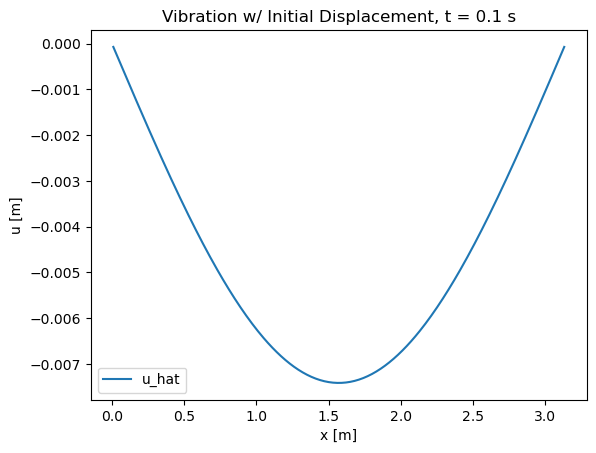

313


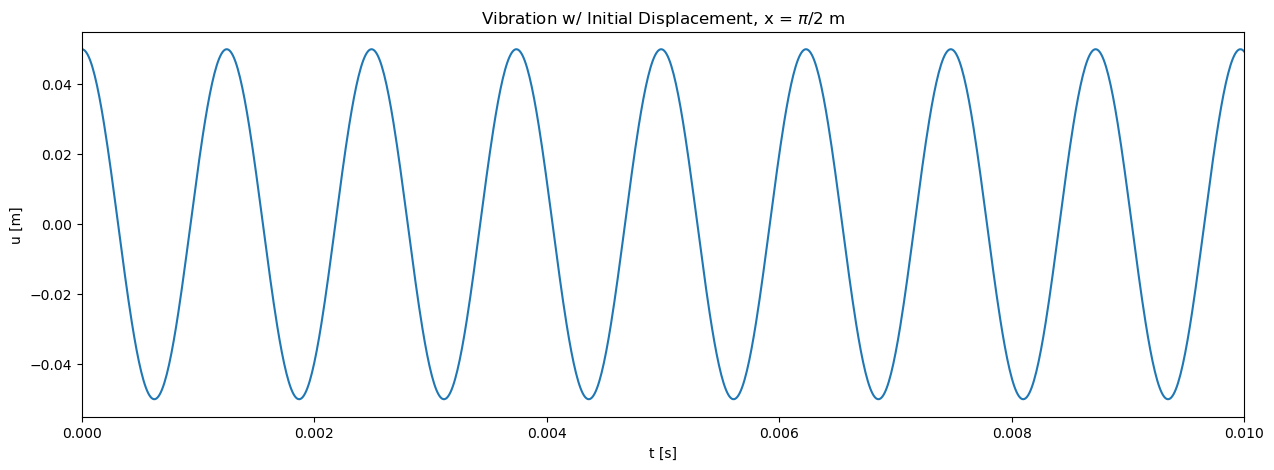

In [24]:
import matplotlib.pyplot as plt
import numpy as np

state_hat_split = np.hsplit(state_hat, 2)

index = 10000

uhat = state_hat_split[0]
vhat = state_hat_split[1]


plt.plot(x, state_hat_split[0][index], label='u_hat')
plt.title('Vibration w/ Initial Displacement, t = 0.1 s')
plt.xlabel('x [m]')
plt.ylabel('u [m]')
plt.legend()
plt.show()

# print(u_true[500])
# print(t[500])
# print(c_squared)

temp_uhat = np.transpose(uhat)
print(len(temp_uhat))

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlim(0,0.01)
ax.set_title('Vibration w/ Initial Displacement, x = $\u03C0$/2 m')
ax.set_ylabel('u [m]')
ax.set_xlabel('t [s]')
ax.plot(t,temp_uhat[156])

#print(uhat)
####
#Approximately 810 Hz